In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('HR_comma_sep.csv.txt')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True, drop = True)

In [7]:
print(set(df.sales),'\n', set(df.salary))

{'RandD', 'product_mng', 'technical', 'support', 'management', 'IT', 'accounting', 'sales', 'marketing', 'hr'} 
 {'high', 'low', 'medium'}


In [8]:
df.rename(columns = {'sales':'department'}, inplace = True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [10]:
df.corr()['left'].sort_values(ascending = False)

C:\Users\VIVEK\AppData\Local\Temp\ipykernel_22168\1303240217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['left'].sort_values(ascending = False)


left                     1.000000
time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
last_evaluation          0.013520
promotion_last_5years   -0.044657
Work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder
for column in ['department', 'salary']:
    le =  LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [12]:
print(df.department.unique())
print(df.salary.unique())

[7 2 3 9 8 4 0 6 5 1]
[1 2 0]


In [13]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
8043,0.64,0.99,4,222,2,0,0,0,9,1
9179,0.67,0.55,3,246,3,0,0,0,2,2
5724,0.59,0.51,4,184,2,0,0,0,5,1
4595,0.93,0.68,3,272,2,1,0,0,7,1
2248,0.99,0.75,3,215,3,0,0,0,9,1


# Visualization

<Axes: >

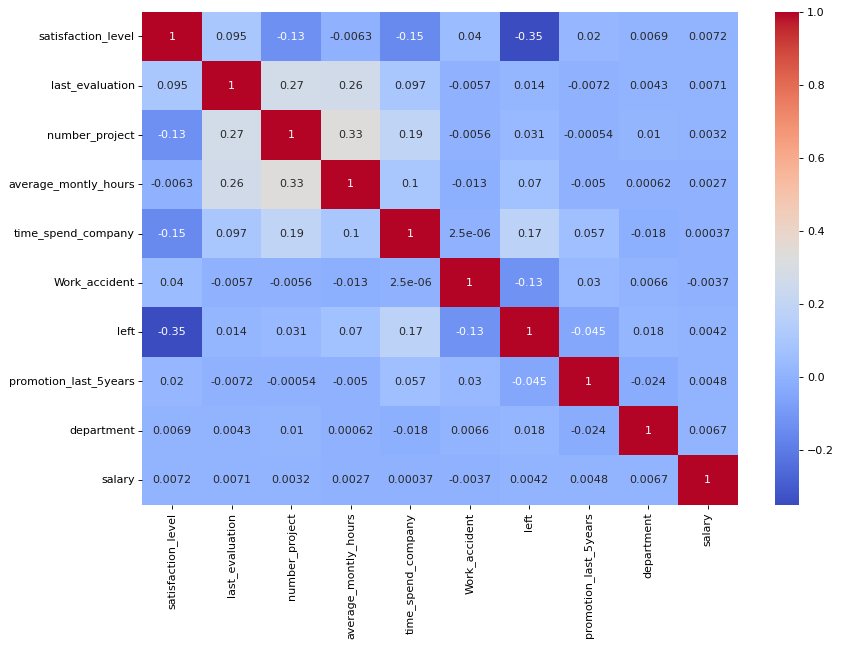

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8),dpi=80)
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>,
        <Axes: title={'center': 'number_project'}>],
       [<Axes: title={'center': 'average_montly_hours'}>,
        <Axes: title={'center': 'time_spend_company'}>,
        <Axes: title={'center': 'Work_accident'}>],
       [<Axes: title={'center': 'left'}>,
        <Axes: title={'center': 'promotion_last_5years'}>,
        <Axes: title={'center': 'department'}>],
       [<Axes: title={'center': 'salary'}>, <Axes: >, <Axes: >]],
      dtype=object)

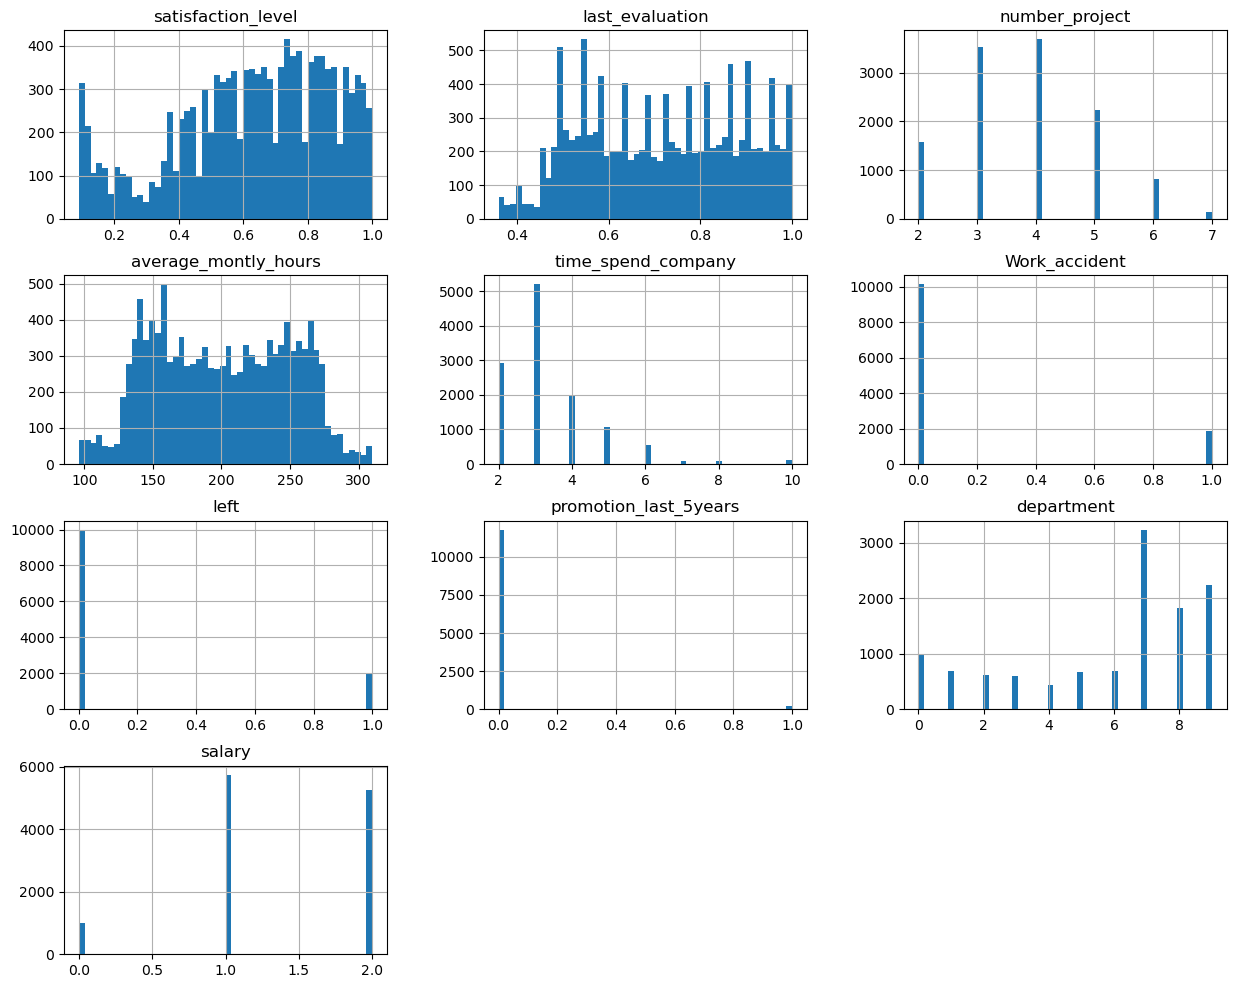

In [15]:
df.hist(bins = 50,figsize=(15,12))

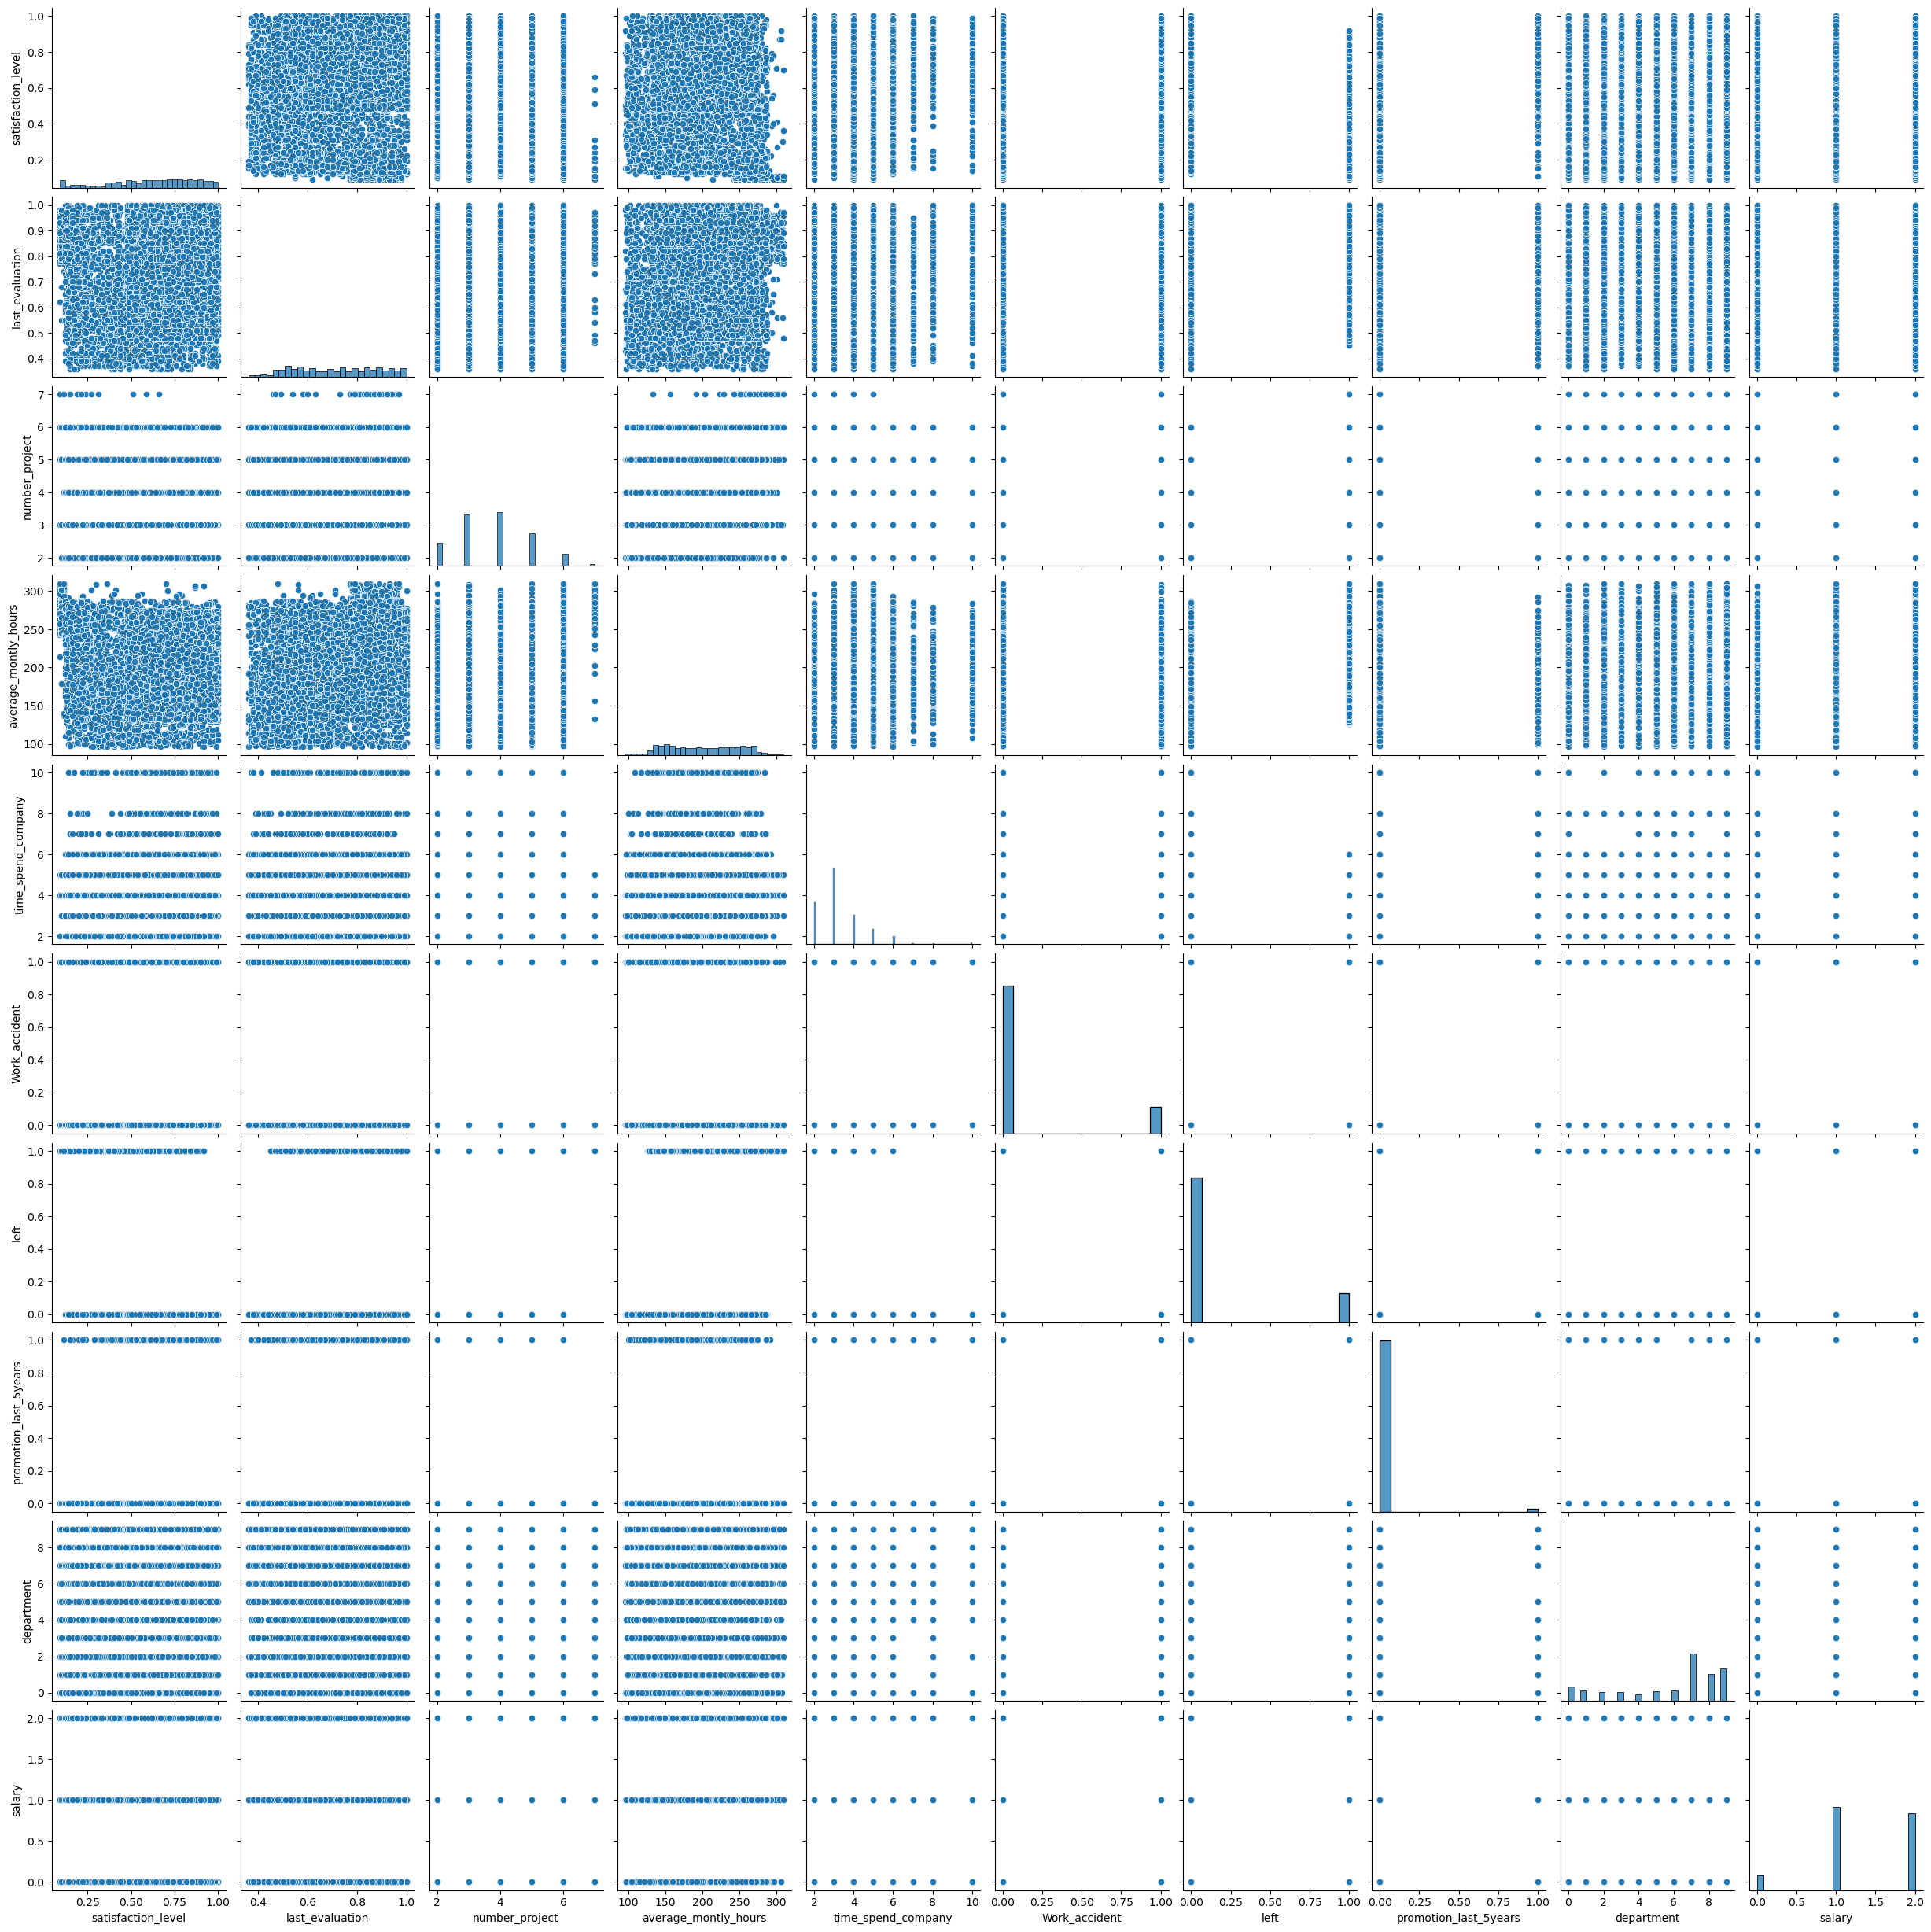

In [16]:
sns.pairplot(df)

# Model Building

In [17]:
# splitting data in x and y
x = df.drop(['left'],axis = 1)
y = df['left']

In [18]:
# splitting data for train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [19]:
# 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [20]:
print(x_train.shape,'\n',x_test.shape,'\n',y_train.shape,'\n',y_test.shape)

(9592, 9) 
 (2399, 9) 
 (9592,) 
 (2399,)


# Model Building

Logistic Regression model

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

KNeighborsClassifier model

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

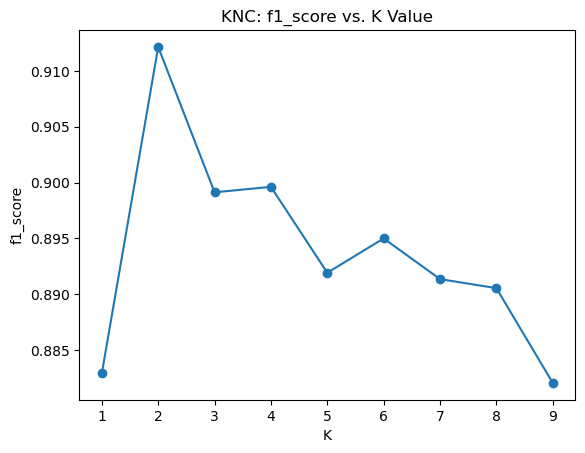

In [26]:
k_vals= []
accuracies = []
k_rng = range(1,10)
for k in k_rng:
    KNC = KNeighborsClassifier(n_neighbors=k)
    KNC.fit(x_train,y_train)
    pred = KNC.predict(x_test)
    acc_score = f1_score(y_test,pred)
    k_vals.append(k)
    accuracies.append(acc_score)

# graph
plt.plot(k_vals, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('f1_score')
plt.title('KNC: f1_score vs. K Value')
plt.show()

In [27]:
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [28]:
y1_pred = knc.predict(x_test)
y1_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

DecisionTreeClassifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y2_pred = dtc.predict(x_test)
y2_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Checking Models accuracies

In [31]:
print('LR model :',f1_score(y_test,y_pred))
print('KNC model :',f1_score(y_test,y1_pred))
print('DTC model :',f1_score(y_test,y2_pred))

LR model : 0.31433506044905
KNC model : 0.9121447028423773
DTC model : 0.9203539823008849


# Decision Tree

In [32]:
# total predicted True positive vlaues
TP = ((y2_pred == 1) & (y_test == 1)).sum()
TP

364

In [33]:
# total predicted True Negative values
TN = ((y2_pred == 0) & (y_test == 0)).sum()
TN

1972

In [34]:
# total predicted False Positive values
FP = ((y2_pred == 1) & (y_test == 0)).sum()
FP

28

In [35]:
# total predicted False Negative values
FN = ((y2_pred == 0) & (y_test == 1)).sum()
FN

35

In [36]:
# total_values in test set
(y_test).value_counts()

0    2000
1     399
Name: left, dtype: int64